# Intern Name:- Yogesh Rajgure
# Task 1 : Students Percentage Prediction Model 


#### The Sparks Foundation
##### Data Science and Business Analytics Inteernship July 2021 

Exploring Supervised Machine Learning:

For the given Task of building a Machine Learning Model for predicting students percentage using number of hours they study as a feature, we are using simple Linear regression. As there is only 1 feature, Linear Regression is the right choice for this model.\

Data for building this model can be found at [http://bit.ly/w-data]



### **Importing Important libraries**

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### **Reading Data**

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

* **We got that, there are no null values in the data, hence we do not need to impute anyting externally.**

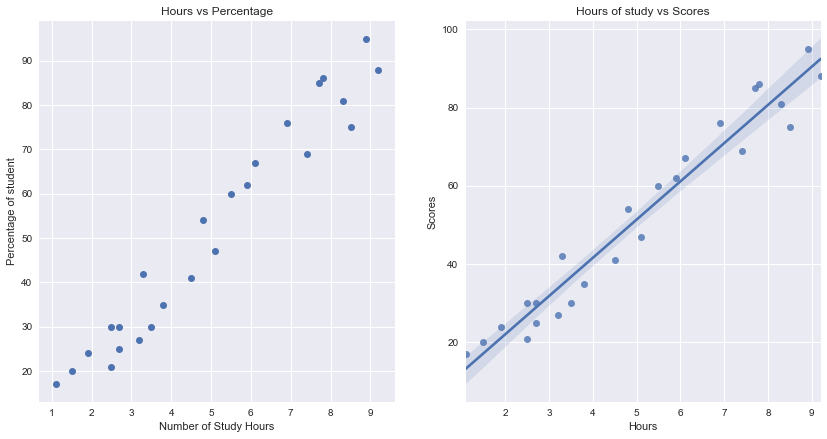

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.plot(df.Hours, df.Scores, 'o')
plt.xlabel('Number of Study Hours')
plt.ylabel("Percentage of student")
plt.title("Hours vs Percentage")

plt.subplot(1,2,2)
sns.regplot(df.Hours, df.Scores)
plt.title('Hours of study vs Scores');
plt.show()


**Left**
* **Here, we can clearly see that the feature 'Hour' is showing linear reationship with target variable 'Scores'. Hence, we are good to go with Simple Linear Regression.**

**Right**
* **Graph shows the best fit line for linear +ve relationship.**


* ### Selecting Feature and Target

Feature: Hours\
Target:  Scores

In [7]:
X = df.iloc[:, :-1].values
#X = df.Hours.values.reshape(-1,1)

#we have writen X in this we so as to get the result in matrix form which is desired
y = df.iloc[:, 1].values  
#y = df.Scores.values.reshape(-1,1)

### **Train-Test split**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


### Linear Regression Model Creation

In [9]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)


LinearRegression()

In [10]:
print('The intercept :-',lr_model.intercept_)
print('The slope     :-',lr_model.coef_)


The intercept :- 2.018160041434669
The slope     :- [9.91065648]


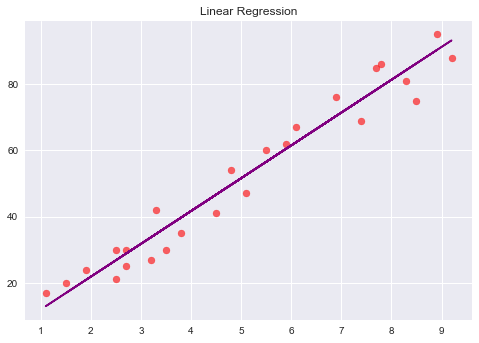

In [11]:
plt.scatter(X, y, color = 'red', alpha=0.6)
plt.plot(X, lr_model.predict(X), color = 'purple')
plt.title('Linear Regression')
plt.show()


In [12]:
lr_model.predict(X_test).flatten()


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
a = {
    'X_test' : X_test.flatten(),
    'y_test' : y_test.flatten(),
    'y_predicted' : lr_model.predict(X_test).flatten()
}

a = pd.DataFrame(a)

In [14]:
a

,X_test,y_test,y_predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


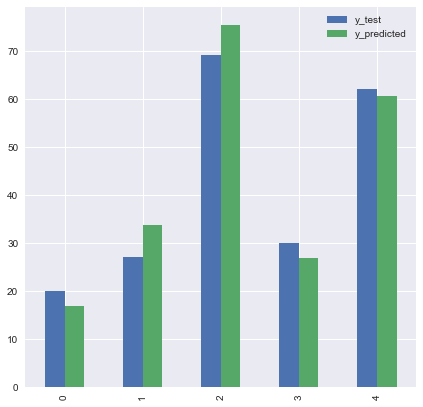

In [15]:
a[['y_test', 'y_predicted']].plot(kind='bar',figsize=(7,7))


In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('Loss function results:\n'+'-'*50)
print('The Mean absolute error     :-',mean_absolute_error(y_test, a['y_predicted']))
print('The Root mean squared error :-',np.sqrt(mean_squared_error(y_test,a['y_predicted'])))

Loss function results:
--------------------------------------------------
The Mean absolute error     :- 4.18385989900298
The Root mean squared error :- 4.647447612100368


In [17]:
lr_model.score(X_train,y_train)

0.9515510725211553

**Such high value of r2 may be due to overfitting of the model**

In [18]:
lr_model.score(X_test, y_test)

0.9454906892105355

**Our test r2 value is in respecting the train r2 value, this is good thing, it shows that the model is not overfitting**

**As, we are having only one feature, hence we do not need the suport of adjusted r2 value**

## From above metrics Linear Regression algorithm has been proven good for the given data to predict/estimate the values

## **The model accuracy is  94.54%**

In [19]:
# You can also test with your own data
hours = np.array(9.25).reshape(-1,1)
own_pred = lr_model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Thank you..